# Project 4: Heart Disease and Time Series Analysis

### Notebook Goals
https://catalog.data.gov/dataset/rates-and-trends-in-heart-disease-and-stroke-mortality-among-us-adults-35-by-county-a-2000-45659

The dataset we are looking at was provided by the US Department of Health & Human Services that gives insight into demographic and geographic information about the rates of heart disease. The initial dataset is over 1.2GB and approximately 6 million rows of data. The goals of this notebook is to clean up the dataset and make it easier to work with for future time series analysis and exploratory data analysis.

In [ ]:
import pandas as pd
import random as rd
import numpy as np
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/Shareddrives/project4_heart_disease/heart_disease.csv")

<ipython-input-2-b1e38ceeb0be>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/Shareddrives/project4_heart_disease/heart_disease.csv")


### Looking At the Data
Here we are exploring the original dataset that is approximately 6 million rows across 21 columns.

In [ ]:
df.shape

(5770240, 21)

In [ ]:
df.head()

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,...,Data_Value_Footnote,Confidence_limit_Low,Confidence_limit_High,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,LocationID
0,1999,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001
1,2013,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001
2,2014,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001
3,2005,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001
4,2012,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001


In [ ]:
df.columns

Index(['Year', 'LocationAbbr', 'LocationDesc', 'GeographicLevel', 'DataSource',
       'Class', 'Topic', 'Data_Value', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Confidence_limit_Low', 'Confidence_limit_High',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'LocationID'],
      dtype='object')

In [ ]:
df['GeographicLevel'].unique()

array(['County'], dtype=object)

In [ ]:




df['DataSource'].unique()

array(['NVSS'], dtype=object)

In [ ]:
df['Class'].unique()

array(['Cardiovascular Diseases'], dtype=object)

In [ ]:
df['StratificationCategory1'].unique()

array(['Age group'], dtype=object)

In [ ]:

df['StratificationCategory2'].unique()

array(['Race'], dtype=object)

In [ ]:
df['StratificationCategory3'].unique()

array(['Sex'], dtype=object)

In [ ]:
df['Topic'].unique()

array(['All heart disease', 'All stroke', 'Coronary heart disease (CHD)',
       'Cardiovascular disease (CVD)', 'Heart failure'], dtype=object)

In [ ]:
df['Data_Value_Type'].unique()

array(['Age-Standardized, Spatiotemporally Smoothed Rate',
       'Total percent change'], dtype=object)

In [ ]:
df['Data_Value_Footnote'].unique()

array(['Value suppressed', nan], dtype=object)

In [ ]:
df['Data_Value_Footnote_Symbol'].unique()

array(['~', nan], dtype=object)

In [ ]:
df['Year'].unique()

array([1999, 2013, 2014, 2005, 2012, 2010, 2009, 2011, 2007, 2019, 2018,
       2004, 2016, 2015, 2000, 2002, 2003, 2006, 2008, 2001, 2017, '2008',
       '2010', '2014', '2016', '2007', '2000', '2002', '2003', '2005',
       '1999', '2013', '2004', '2001', '2017', '2006', '2009', '2012',
       '2015', '2018', '2019', '2011', '1999 - 2010', '2010 - 2019'],
      dtype=object)

In [ ]:
df['Data_Value_Unit'].unique()

array(['per 100,000', '%'], dtype=object)

### Cleaning Columns

Here we changed the column names to be lowercase, renamed columns to be easier to use, and we dropped columns that aren't applicable to our project.

In [ ]:
df.columns = map(str.lower, df.columns)

In [ ]:
df.columns

Index(['year', 'locationabbr', 'locationdesc', 'geographiclevel', 'datasource',
       'class', 'topic', 'data_value', 'data_value_unit', 'data_value_type',
       'data_value_footnote_symbol', 'data_value_footnote',
       'confidence_limit_low', 'confidence_limit_high',
       'stratificationcategory1', 'stratification1', 'stratificationcategory2',
       'stratification2', 'stratificationcategory3', 'stratification3',
       'locationid'],
      dtype='object')

In [ ]:
df = df.drop(columns=['stratificationcategory1','stratificationcategory2', 'stratificationcategory3', 'geographiclevel', 'datasource',
                      'class', 'locationid', 'data_value_footnote', 'data_value_footnote_symbol'], axis=1)

In [ ]:

df = df.rename(columns={'stratification1':'age_group', 'stratification2':'race', 'stratification3':'sex',
                        'locationdesc':'county', 'locationabbr':'state', 'topic':'disease'})

In [ ]:

df.head()

,year,state,county,disease,data_value,data_value_unit,data_value_type,confidence_limit_low,confidence_limit_high,age_group,race,sex
0,1999,AL,Autauga,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
1,2013,AL,Autauga,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
2,2014,AL,Autauga,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
3,2005,AL,Autauga,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
4,2012,AL,Autauga,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall


### Cleaning Rows
Here are main objectives are to drop the NaN values and see what data we are actually dropping by doing that. Additionally, we aim to change the data types and values to make them uniform.


In [ ]:
# check proportion of rows for each column
df.isna().sum() / df.shape[0]

year                     0.000000
state                    0.000000
county                   0.000000
disease                  0.000000
data_value               0.409944
data_value_unit          0.000000
data_value_type          0.000000
confidence_limit_low     0.409944
confidence_limit_high    0.409944
age_group                0.000000
race                     0.000000
sex                      0.000000
dtype: float64





Before we drop the na rows, let's see what percentage of those na rows are associated with specific column values.

In [ ]:
# for the rows of data_value that are missing, what proportion of the other columns are affected by the drop
nan_rows = df[df['data_value'].isna()]
unique_states = df['state'].unique()

# Dictionary to store results
nan_percentage_by_state = {}

for state in unique_states:
    nan_rows_specific_state = nan_rows[nan_rows['state'] == state]

    percentage_nan_specific_state = (len(nan_rows_specific_state) / len(nan_rows)) * 100

    nan_percentage_by_state[state] = percentage_nan_specific_state

for state, percentage in nan_percentage_by_state.items():
    print(f"The percentage of NaN rows associated with '{state}' state: {percentage:.2f}%")

The percentage of NaN rows associated with 'AL' state: 1.80%
The percentage of NaN rows associated with 'AK' state: 0.98%
The percentage of NaN rows associated with 'AZ' state: 0.20%
The percentage of NaN rows associated with 'AR' state: 2.37%
The percentage of NaN rows associated with 'CA' state: 0.82%
The percentage of NaN rows associated with 'CO' state: 2.21%
The percentage of NaN rows associated with 'CT' state: 0.09%
The percentage of NaN rows associated with 'DE' state: 0.03%
The percentage of NaN rows associated with 'FL' state: 1.15%
The percentage of NaN rows associated with 'DC' state: 0.00%
The percentage of NaN rows associated with 'GA' state: 4.56%
The percentage of NaN rows associated with 'HI' state: 0.13%
The percentage of NaN rows associated with 'ID' state: 1.62%
The percentage of NaN rows associated with 'IL' state: 3.29%
The percentage of NaN rows associated with 'IN' state: 3.03%
The percentage of NaN rows associated with 'IA' state: 3.63%
The percentage of NaN ro

In [ ]:
# percentage of dropped race data
nan_rows = df[df['data_value'].isna()]
unique_race = df['race'].unique()

# Dictionary to store results
nan_percentage_by_race= {}

for races in unique_race:
    nan_rows_specific_race = nan_rows[nan_rows['race'] == races]

    percentage_nan_specific_race = (len(nan_rows_specific_race) / len(nan_rows)) * 100

    nan_percentage_by_race[races] = percentage_nan_specific_race

for races, percentage in nan_percentage_by_race.items():
    print(f"The percentage of NaN rows associated with '{races}' race: {percentage:.2f}%")

The percentage of NaN rows associated with 'American Indian/Alaska Native' race: 27.94%
The percentage of NaN rows associated with 'Overall' race: 5.16%
The percentage of NaN rows associated with 'Asian/Pacific Islander' race: 25.57%
The percentage of NaN rows associated with 'Black (Non-Hispanic)' race: 19.19%
The percentage of NaN rows associated with 'Hispanic' race: 20.83%
The percentage of NaN rows associated with 'White' race: 1.32%


In [ ]:
# percentage of dropped sex rows
nan_rows = df[df['data_value'].isna()]
unique_sex = df['sex'].unique()

# Dictionary to store results
nan_percentage_by_sex= {}

for sexes in unique_sex:
    nan_rows_specific_sex = nan_rows[nan_rows['sex'] == sexes]

    percentage_nan_specific_sex = (len(nan_rows_specific_sex) / len(nan_rows)) * 100

    nan_percentage_by_sex[sexes] = percentage_nan_specific_sex

for sexes, percentage in nan_percentage_by_sex.items():
    print(f"The percentage of NaN rows associated with '{sexes}' sex: {percentage:.2f}%")

The percentage of NaN rows associated with 'Overall' sex: 95.65%
The percentage of NaN rows associated with 'Men' sex: 2.26%
The percentage of NaN rows associated with 'Women' sex: 2.09%


In [ ]:
# percentage of dropped age rows
nan_rows = df[df['data_value'].isna()]
unique_age = df['age_group'].unique()

# Dictionary to store results
nan_percentage_by_age= {}

for ages in unique_age:
    nan_rows_specific_age = nan_rows[nan_rows['age_group'] == ages]

    percentage_nan_specific_age = (len(nan_rows_specific_age) / len(nan_rows)) * 100

    nan_percentage_by_age[ages] = percentage_nan_specific_age

for ages, percentage in nan_percentage_by_age.items():
    print(f"The percentage of NaN rows associated with '{ages}' age: {percentage:.2f}%")

The percentage of NaN rows associated with 'Ages 35-64 years' age: 44.55%
The percentage of NaN rows associated with 'Ages 65 years and older' age: 55.45%


In [ ]:
df = df.dropna()

In [ ]:
target_rows = df[df['year'].isin(['1999 - 2010', '2010 - 2019'])]

In [ ]:
df = df.drop(target_rows.index)

In [ ]:
df['year'] = df['year'].astype(int)

Here we are maxing the rate_disease uniform by making it a percentage.

In [ ]:
df.loc[df['data_value_unit'] == 'per 100,000', 'rate_disease'] = (df['data_value'] / 100000) * 100
df.loc[df['data_value_unit'] == '%', 'rate_disease'] = df['data_value']

In [ ]:
df.head()

,year,state,county,disease,data_value,data_value_unit,data_value_type,confidence_limit_low,confidence_limit_high,age_group,race,sex,rate_disease
53,2016,AL,Autauga,All stroke,25.7,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",21.3,30.9,Ages 35-64 years,Overall,Overall,0.0257
79,2011,AL,Autauga,All stroke,29.5,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",22.9,39.7,Ages 35-64 years,Overall,Men,0.0295
106,2017,AL,Autauga,All stroke,33.6,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",25.4,44.1,Ages 35-64 years,Overall,Men,0.0336
108,2017,AL,Autauga,All heart disease,128.7,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",113.1,144.7,Ages 35-64 years,Overall,Overall,0.1287
109,2016,AL,Autauga,All heart disease,128.1,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",114.1,145.5,Ages 35-64 years,Overall,Overall,0.1281


Let's look at the spread of column values.

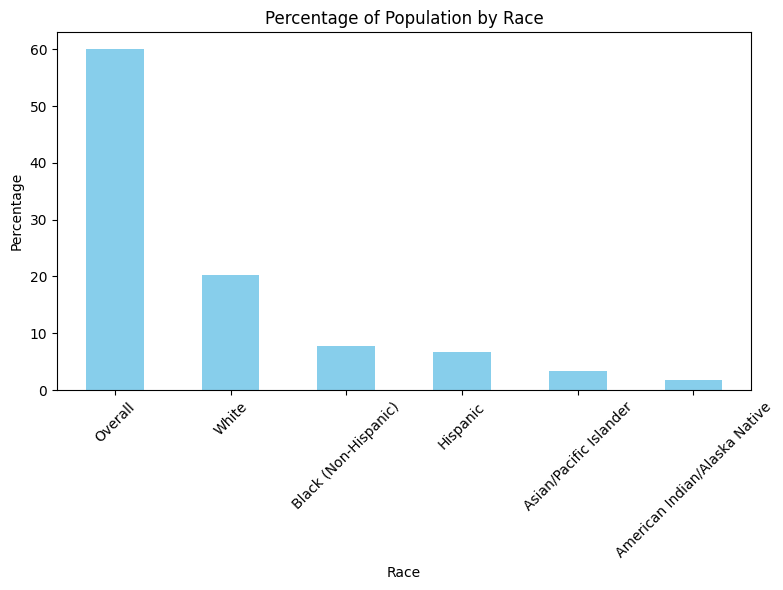

In [ ]:
race_counts = df['race'].value_counts()

race_percentages = (race_counts / race_counts.sum()) * 100

# Plotting
plt.figure(figsize=(8, 6))
race_percentages.plot(kind='bar', color='skyblue')
plt.xlabel('Race')
plt.ylabel('Percentage')
plt.title('Percentage of Population by Race')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

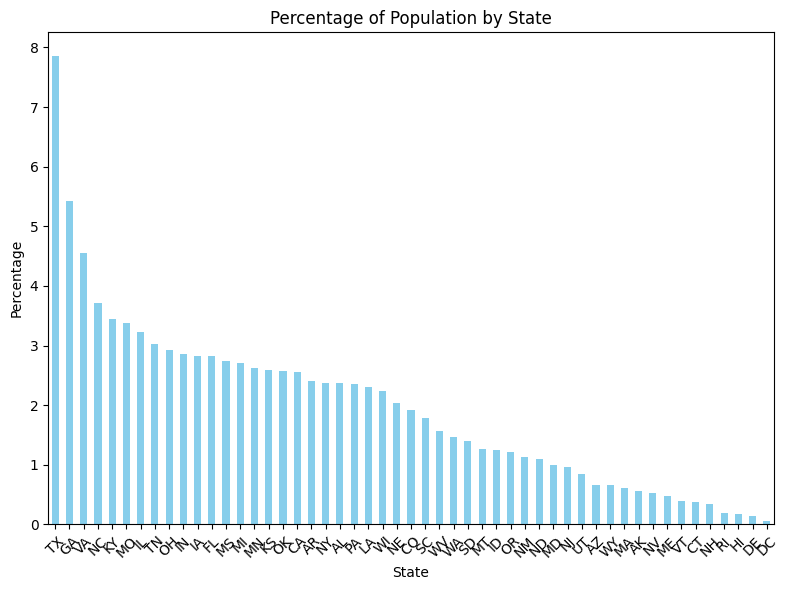

In [ ]:
state_counts = df['state'].value_counts()

state_percentages = (state_counts / state_counts.sum()) * 100

# Plotting
plt.figure(figsize=(8, 6))
state_percentages.plot(kind='bar', color='skyblue')
plt.xlabel('State')
plt.ylabel('Percentage')
plt.title('Percentage of Population by State')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

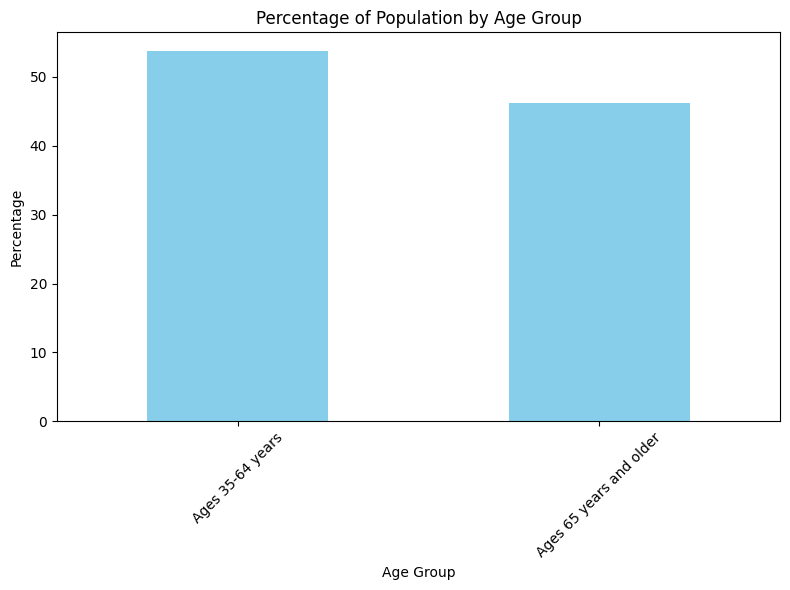

In [ ]:
age_counts = df['age_group'].value_counts()

age_percentages = (age_counts / age_counts.sum()) * 100

# Plotting
plt.figure(figsize=(8, 6))
age_percentages.plot(kind='bar', color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.title('Percentage of Population by Age Group')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

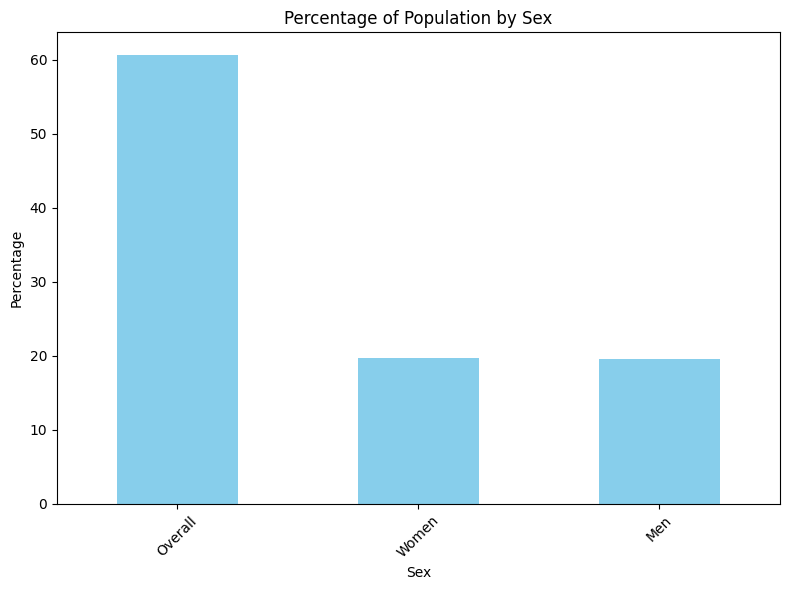

In [ ]:
sex_counts = df['sex'].value_counts()

sex_percentages = (sex_counts / sex_counts.sum()) * 100

# Plotting
plt.figure(figsize=(8, 6))
sex_percentages.plot(kind='bar', color='skyblue')
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.title('Percentage of Population by Sex')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### Changing Value Types
Here we are changing the Age Group values to Adult and Senior. We are also creating a column that provides the geographic region.

In [ ]:
df.loc[df['age_group']=='Ages 35-64 years', 'age_group'] = 'Adult'
df.loc[df['age_group']=='Ages 65 years and older', 'age_group'] = 'Senior'

In [ ]:
southeast = ['AL','AR','FL','GA','KY','LA','MS','NC','SC','TN','VA','WV']
west = ['AK','CA','CO','HI','ID','MT','NV','OR','UT','WA','WY']
southwest = ['AZ','NM','OK','TX']
northeast = ['CT','DE','DC','ME','MD','MA','NH','NJ','NY','PA','RI','VT']
midwest = ['IL','IN','IA','KS','MI','MN','MO','NE','ND','OH','SD','WI']

In [ ]:
for state in southeast:
  df.loc[df['state'] == state, 'region'] = 'Southeast'

for state in west:
  df.loc[df['state'] == state, 'region'] = 'West'

for state in southwest:
  df.loc[df['state'] == state, 'region'] = 'Southwest'

for state in northeast:
  df.loc[df['state'] == state, 'region'] = 'Northeast'

for state in midwest:
  df.loc[df['state'] == state, 'region'] = 'Midwest'

### Save cleaned csv file
Here we are saving all of our work to a csv file to use for our EDA and TSA.

In [ ]:
df.to_csv('/content/drive/Shareddrives/project4_heart_disease/cleaned_heart_disease.csv')